In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv('School_Learning_Modalities__2021-2022.csv')
df

,District NCES ID,District Name,Week,Learning Modality,Operational Schools,Student Count,City,State,ZIP Code
0,100005,Albertville City,12/25/2022 12:00:00 AM,In Person,6,5824.0,Albertville,AL,35950
1,100006,Marshall County,12/25/2022 12:00:00 AM,In Person,15,5764.0,Guntersville,AL,35976
2,100007,Hoover City,12/25/2022 12:00:00 AM,In Person,18,14061.0,Hoover,AL,35243
3,100008,Madison City,12/25/2022 12:00:00 AM,In Person,11,11695.0,Madison,AL,35758
4,100011,Leeds City,12/25/2022 12:00:00 AM,In Person,4,2076.0,Leeds,AL,35094
...,...,...,...,...,...,...,...,...,...
994783,5900187,Hannahville Indian School,08/01/2021 12:00:00 AM,In Person,1,163.0,Wilson,BI,49896
994784,5900190,Tiospaye Topa School,08/01/2021 12:00:00 AM,In Person,1,157.0,LaPlant,BI,57652
994785,5900193,Seba Dalkai Boarding School,08/01/2021 12:00:00 AM,Hybrid,1,65.0,Winslow,BI,86047
994786,5900197,Noli School,08/01/2021 12:00:00 AM,In Person,1,123.0,San Jacinto,BI,92581


In [46]:
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

states_list = list(states.keys())

In [56]:
print("Estados inválidos: ", df[~df['State'].isin(states_list)].State.unique())

df = df[df['State'].isin(states_list)]

Estados inválidos:  ['BI' 'PR']


In [58]:
df_grouped = df[['State', 'City', 'ZIP Code', 'Learning Modality', 'Student Count']].fillna(0)
df_grouped['Country'] = 'United States'

In [63]:
df_mood = df_grouped.groupby(['Country', 'State', 'Learning Modality']).sum()

C:\Users\Adinan\AppData\Local\Temp\ipykernel_14056\2477180058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mood = df_grouped.groupby(['Country', 'State', 'Learning Modality']).sum()


In [65]:
df_mood.to_csv("df_mood.csv")

In [38]:
df.State.unique()

<bound method Series.unique of 0         AL
1         AL
2         AL
3         AL
4         AL
          ..
994783    BI
994784    BI
994785    BI
994786    BI
994787    PR
Name: State, Length: 994788, dtype: object>

In [21]:
#df_mood = df.groupby(["State", "Learning Modality"])["Learning Modality"].count()
#df_mood.to_excel("df_mood.xlsx")
df_mood.to_csv("df_mood.csv")

df2 = pd.read_csv('df_mood.csv')
df2.to_excel("df_mood.xlsx")

In [15]:
df_piv = df_mood.pivot_table(index='State', columns='Learning Modality', values='Student Count')


In [18]:
df_piv = df_piv.fillna(0)
df_piv.to_excel("df_piv.xlsx")

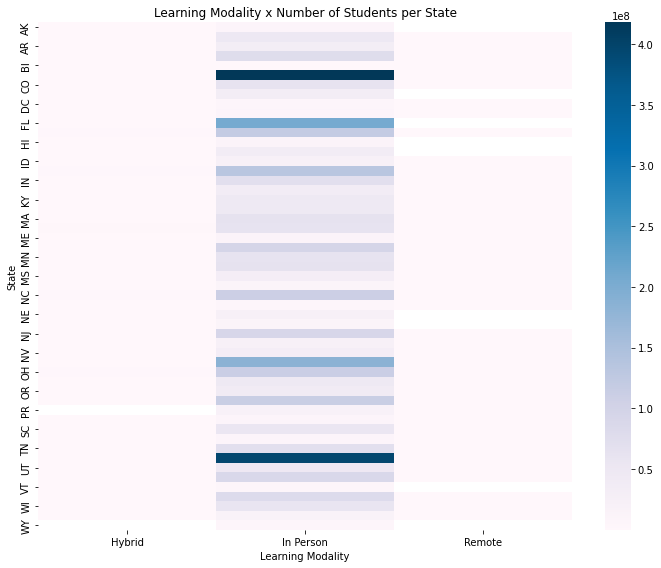

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_piv, cmap='PuBu')
plt.title('Learning Modality x Number of Students per State')
plt.tight_layout()
plt.savefig('HeatMap.png', dpi=300)
plt.show()